In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Train and test on the entire dataset (Problematic)

In [76]:
from sklearn.datasets import load_iris
iris=load_iris()

In [77]:
type(iris)

sklearn.utils.Bunch

In [78]:
X=iris.data
y=iris.target

In [81]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [82]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 4 Steps (Logistic regression as an example)

### import the class

In [6]:
from sklearn.linear_model import LogisticRegression

### instantiate the model using default parameters

In [7]:
logreg=LogisticRegression()

### fit the model with data

In [8]:
logreg.fit(X,y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### predict the response values for the obsevations in X

In [9]:
y_pred=logreg.predict(X)

## Classifictaion accuracy

### compute classification accuracy

In [10]:
from sklearn import metrics
metrics.accuracy_score(y,y_pred)

0.96

In [11]:
# KNN K=5
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred=knn.predict(X)
metrics.accuracy_score(y,y_pred)

0.9666666666666667

In [12]:
# KNN K=1
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred=knn.predict(X)
metrics.accuracy_score(y,y_pred)

1.0

# Train_test_split (Ruotine)

## split the data into trianing set and testing test

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=4)

In [14]:
X_train.shape

(90, 4)

In [15]:
X_test.shape

(60, 4)

## train the model on the traning set

In [16]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)



## make prediction on the testing set

### Logistic Regression

In [92]:
# LogReg
y_pred=logreg.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9333333333333333

In [93]:
pd.crosstab(y_test,y_pred,rownames=["Actual"],colnames=["Predicted"])

Predicted,0,1,2
Actual,,,
0,25,0,0
1,0,15,2
2,0,2,16


### Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier

dt=tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9666666666666667

In [95]:
pd.crosstab(y_test,y_pred,rownames=["Actual"],colnames=["Predicted"])

Predicted,0,1,2
Actual,,,
0,25,0,0
1,0,17,0
2,0,2,16


### Random Forest

In [96]:
# randomforest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9666666666666667

In [68]:
pd.crosstab(y_test,y_pred,rownames=["Actual"],colnames=["Predicted"])

Predicted,0,1,2
Actual,,,
0,25,0,0
1,0,17,0
2,0,2,16


In [72]:
rf.predict(X_test)[0:10]

array([2, 0, 2, 2, 2, 1, 1, 0, 0, 1])

In [83]:
# mapping numbers with target names
iris.target_names[rf.predict(X_test)[0:10]]

array(['virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor'],
      dtype='<U10')

In [71]:
rf.predict_proba(X_test)[0:10]

array([[0. , 0. , 1. ],
       [0.5, 0.5, 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [0.5, 0.5, 0. ],
       [1. , 0. , 0. ],
       [0. , 0.6, 0.4]])

### KNN

In [98]:
# KNN K=5
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9666666666666667

In [99]:
pd.crosstab(y_test,y_pred,rownames=["Actual"],colnames=["Predicted"])

Predicted,0,1,2
Actual,,,
0,25,0,0
1,0,15,2
2,0,0,18


In [101]:
# KNN K=1
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.95

In [102]:
pd.crosstab(y_test,y_pred,rownames=["Actual"],colnames=["Predicted"])

Predicted,0,1,2
Actual,,,
0,25,0,0
1,0,16,1
2,0,2,16


Text(0, 0.5, 'Testing Accuracy')

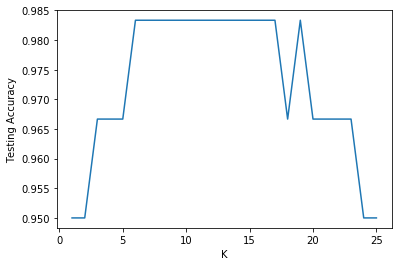

In [20]:
# find optimal K using metrics.accuracy_score
k_range=range(1,26)
scores=[]
for k in k_range:
    knn=knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

plt.plot(k_range,scores)
plt.xlabel("K")
plt.ylabel("Testing Accuracy")

In [104]:
# KNN K=10
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9833333333333333

In [105]:
pd.crosstab(y_test,y_pred,rownames=["Actual"],colnames=["Predicted"])

Predicted,0,1,2
Actual,,,
0,25,0,0
1,0,16,1
2,0,0,18



## Making prediction on out-of-sample data

In [22]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
knn.predict(np.array([[3,5,4,2]]))

array([1])

# Cross  Validation

## k-fold cross validation

In [23]:

from sklearn.model_selection import KFold
### KFold repeats train_test_split k times
### K=10 is generally recommended
### classification problem: stratified sampling is recommended for creating folds





## parameter tuning

In [24]:
# 10-fold cross validation with K=5 for knn(different as k from k-fold)
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
scores.mean()

0.9666666666666668

In [25]:
# find optimal K using cross_val_score
k_range=range(1,31)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    scores.append(nd.mean(scores))
print(scores)

plt.plot(k_range,scores)
plt.xlabel("K")
plt.ylabel("Cross-validated Accuracy")

AttributeError: 'numpy.ndarray' object has no attribute 'append'

## Model selection

In [26]:
# model 1
#10-fold cross validation with K=20 for knn(different as k from k-fold)
knn=KNeighborsClassifier(n_neighbors=20)
cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean()

0.9800000000000001

In [27]:
# model 2
# 10-fold cross validation with LogReg
print(cross_val_score(logreg,X,y,cv=10,scoring='accuracy').mean())

0.9533333333333334


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.


## feature selection